In [1]:
# 필요 라이브러리 import 
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 윈저사이저 적용
df = pd.read_csv('../D2분류모델 + 성능평가/.csv', encoding='CP949')
df.drop(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '산업명', '소속코드', 'month'],axis=1,inplace=True)
for col in df.columns:
     df[col] = winsorize(df[col], limits= 0.01)

In [3]:
# 공통선정피쳐
[['[제조]이자보상배율','[제조]기계투자효율','[제조]1주당 순이익','[제조]자기자본배율','[제조]매출액순이익률','[제조]순이익증가율','[제조]1주당매출액','[제조]부가가치','[제조]부채비율','[제조]자기자본배율','[제조]순운전자본비율']]

[['[제조]이자보상배율',
  '[제조]기계투자효율',
  '[제조]1주당 순이익',
  '[제조]자기자본배율',
  '[제조]매출액순이익률',
  '[제조]순이익증가율',
  '[제조]1주당매출액',
  '[제조]부가가치',
  '[제조]부채비율',
  '[제조]자기자본배율',
  '[제조]순운전자본비율']]

In [5]:
# Data set1 공통 선정된 피처들 분리
df = df.sort_values(["year"],ascending=True)
df_data = df[['[제조]이자보상배율','[제조]기계투자효율','[제조]1주당 순이익','[제조]자기자본배율','[제조]매출액순이익률','[제조]순이익증가율','[제조]1주당매출액','[제조]부가가치','[제조]부채비율','[제조]자기자본배율','[제조]순운전자본비율']]
# df_data_scaled= StandardScaler().fit_transform(df_data)
# df_data_scaled= MinMaxScaler().fit_transform(df_data)
# df_data_scaled = pd.DataFrame(df_data_scaled)
# df_data_scaled.columns =[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율','[제조]자기자본증가율',
# '[제조]현금비율','[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']]
# df[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율',
# '[제조]자기자본증가율','[제조]현금비율','[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']] = df_data_scaled[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율','[제조]자기자본증가율','[제조]현금비율','[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']]
df =df.reset_index(drop="index")
df.describe()

KeyError: "['[제조]이자보상배율', '[제조]1주당 순이익'] not in index"

In [9]:
# train test set 분리
df1 = df[df['year']<2019] #train
df2 = df[df['year']>=2019] #test
# train data label 분리 test data label 분리
X_train= df1[['[제조]순운전자본회전률','[제조]총자본증가율','[제조]자본분배율',
              '[제조]매출액순이익률','[제조]부채비율','[제조]자기자본순이익률','[제조]비유동자산회전률']]
X_test = df2[['[제조]순운전자본회전률','[제조]총자본증가율','[제조]자본분배율',
              '[제조]매출액순이익률','[제조]부채비율','[제조]자기자본순이익률','[제조]비유동자산회전률']]
y_train = df1["lable"]
y_test = df2["lable"]

# x_train_scaled= StandardScaler().fit_transform(X_train)
# x_test_scaled = fit_transform(X_test)
# # df_data_scaled= MinMaxScaler().fit_transform(df_data)
# X_train_scaled = pd.DataFrame(x_train_scaled)
X_test.describe()

,[제조]순운전자본회전률,[제조]총자본증가율,[제조]자본분배율,[제조]매출액순이익률,[제조]부채비율,[제조]자기자본순이익률,[제조]비유동자산회전률
count,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000
mean,0.955813,10.399774,10.344401,-10.094542,103.202628,-4.078185,2.122800
std,0.487547,28.208186,104.258605,47.308878,126.290017,28.080596,2.031787
min,0.130000,-48.460000,-704.840000,-265.820000,4.930000,-164.570000,0.160000
25%,0.610000,-3.185000,2.867500,-6.647500,31.645000,-8.777500,0.910000
50%,0.920000,4.990000,33.010000,1.885000,69.540000,2.570000,1.510000
75%,1.230000,16.777500,50.982500,7.807500,125.712500,9.680000,2.572500
max,2.610000,145.960000,82.940000,39.710000,928.650000,43.750000,13.180000


In [10]:
# 기본적인 LDA 구현
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train,y_train)
lda_pred = lda_clf.predict(X_test)
lda_pred_proba = lda_clf.predict_proba(X_test)

In [11]:
from sklearn.model_selection import GridSearchCV


In [12]:
# 디시전트리 구현
from sklearn.tree import DecisionTreeClassifier       
dt_clf = DecisionTreeClassifier(random_state=52)     
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)

In [17]:

tree = DecisionTreeClassifier()

# 딕셔너리로 전달
# key: 하이퍼파라미터 명; value: [후보값들] 을 리스트로 전달
param_grid = {
    'max_depth':[2,3,4,5,6,7,8], #7개
    'min_samples_leaf':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  #4개 --> 7x4 = 총 28개의 조합
}
grid_search = GridSearchCV(tree
                          , param_grid = param_grid
                          , cv = 5 #교차검증시 fold 개수; n번의 교차검증; 데이터들이 돌아가면서 하나씩 검증(validation)에 사용되어 일반화하는 것; 데이터가 많지 않을 때 보통 쓰인다고 함
                          , n_jobs = -1)  #-1: 모든 코어 사용

grid_search.fit(X_train, y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))

최적 하이퍼 파라미터 :{'max_depth': 2, 'min_samples_leaf': 19}, 최적 평균 정확도 :0.983


In [18]:
#최적 하이퍼 파라미터 적용 디시전 트리  
#{'max_depth': 2, 'min_samples_leaf': 19}, 최적 평균 정확도 :0.983
  
dt_clf_best = DecisionTreeClassifier(random_state=52,max_depth= 2,min_samples_leaf=19)     
dt_clf_best.fit(X_train, y_train)
dt_best_pred = dt_clf_best.predict(X_test)
dt_best_pred_proba = dt_clf_best.predict_proba(X_test)

In [19]:
# 랜덤포레스트 구현
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=52)     
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

In [ ]:
# 하이퍼파라미터 Grid-Search
from sklearn.model_selection import GridSearchCV

# 탐색 범위 정의
grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,4,6,8],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4,6,8.10],
               'min_samples_split': [4,6,8,10],
               'n_estimators': [20,40,60,80,100]}

model = RandomForestClassifier()
grid = GridSearchCV(estimator = model, param_grid = grid_search, 
                               cv = 4,verbose=0, n_jobs = -1)
grid.fit(X_train,y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid.best_params_, grid.best_score_))


In [22]:
# 랜덤 포레스트 최적 하이퍼 파라미터 적용
# 최적 하이퍼 파라미터 :{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 4, 
# 'min_samples_split': 6, 'n_estimators': 60}, 최적 평균 정확도 :0.984
rf_clf_best = RandomForestClassifier(random_state=52, criterion = 'entropy', max_features= 'auto',
                                     max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=60)
rf_clf_best.fit(X_train, y_train)
rf_best_pred = rf_clf_best.predict(X_test)
rf_best_pred_proba = rf_clf_best.predict_proba(X_test)

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [23]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)


c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#로지스틱 회귀 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2','l1','elasticnet','None'],
          'C':[0.01,0.1,1,1,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(X_train,y_train)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

최적 하이퍼 파라미어:{'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도:0.982


In [24]:
#최적 하이퍼 파라미어:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.982
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression(C = 0.01, penalty= 'l2')
lr_clf.fit(X_train, y_train)
lr_best_pred = lr_clf.predict(X_test)
lr_best_pred_proba = lr_clf.predict_proba(X_test)

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# KNN 모형 구현
# 3. 거리 계산을 위해서 각 특성들을 스케일링(표준화) [Z-score 표준화: 평균을 0, 표준편차 1로 변환]
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler() # Scaler 객체 생성
scaler.fit(X_train) 
knn_X_train = scaler.transform(X_train) # 스케일링(표준화 수행)
knn_X_test = scaler.transform(X_test)

# k-NN 분류기를 생성
knn_clf = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
knn_clf.fit(knn_X_train, y_train)
# 예측

knn_pred = knn_clf.predict(knn_X_test)
knn_pred_proba = knn_clf.predict_proba(X_test)


c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [26]:
# knn 파라미터 구하기
from sklearn.metrics import accuracy_score
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(knn_X_train, y_train)
    knn_pred = knn_clf.predict(knn_X_test)
    knn_score=accuracy_score(y_test,knn_pred)
    print(k)
    print(knn_score)
    
    

1
0.9731203739774056
2
0.9863654070899883
3
0.9844176081028437
4
0.9871445266848461
5
0.9855862874951306
6
0.987534086482275
7
0.9871445266848461
8
0.9883132060771328
9
0.9887027658745617
10
0.9883132060771328


In [27]:
# knn 최적의 파라미터 모델
knn_clf = KNeighborsClassifier(n_neighbors=3)
# 분류기 학습
knn_clf.fit(knn_X_train, y_train)
# 예측

knn_best_pred = knn_clf.predict(knn_X_test)
knn_best_pred_proba = knn_clf.predict_proba(X_test)


c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [17]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [18]:
from xgboost import XGBClassifier

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [21]:
#XG 부스트 모형 구현
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance 
X_train_XG= df1[['[제조]순운전자본회전률','[제조]총자본증가율',
              '[제조]부채비율','[제조]자기자본순이익률','[제조]비유동자산회전률']]
X_train_XG.columns = [['순운전자본회전률','총자본증가율'
              '매출액순이익률','부채비율','자기자본순이익률','비유동자산회전률']]
X_test_XG = df2[['[제조]순운전자본회전률','[제조]총자본증가율'
              ,'[제조]부채비율','[제조]자기자본순이익률','[제조]비유동자산회전률']]
X_test_XG.columns =[['순운전자본회전률','총자본증가율'
              ,'부채비율','자기자본순이익률','비유동자산회전률']]
y_train_XG = df1["lable"]
y_test_XG = df2["lable"]
X_tr_XG, X_val_XG, y_tr_XG, y_val_XG = train_test_split(X_train_XG, y_train_XG,test_size = 0.1, random_state = 156)
# df1 = df[df['year']<2019] #train
# df2 = df[df['year']>=2019] #test
# train data label 분리 test data label 분리
params_dict = {'objective' : 'binary:logistic',
               'n_estimators' : 400,
               'learning_rate' : 0.05,
               'max_depth' : 3,
               'eval_metric' : 'logloss'
               }

xgb_wrapper = XGBClassifier(Param=params_dict)

xgb_wrapper.fit(X_train_XG, y_train_XG, verbose = True)


xgb_pred = xgb_wrapper.predict(X_test)
xgb_pred_proba = xgb_wrapper.predict_proba(X_test)




c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:31:34] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:31:35] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ValueError: Feature shape mismatch, expected: 5, got 7

In [4]:
#xgb 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {
          'n_estimators':[20,40,60,80,100],
          'learning_rate':[0.03,0.05,0.07,0.09],
          'max_depth' : [4,6,8,10]
          }

grid_clf = GridSearchCV(xgb_wrapper, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(X_train_XG,y_train_XG)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

NameError: name 'xgb_wrapper' is not defined

In [5]:
# xgb부스트 최적의 파라미터
#최적 하이퍼 파라미어:{'learning_rate': 0.07, 'max_depth': 4, 'n_estimators': 100}, 최적 평균 정확도:0.984
xgb_wrapper = XGBClassifier(learning_rate= 0.07, max_depth= 4, n_estimators= 100)

xgb_wrapper.fit(X_train_XG, y_train_XG, verbose = True)

xgb_best_pred = xgb_wrapper.predict(X_test)
xgb_best_pred_proba = xgb_wrapper.predict_proba(X_test)

NameError: name 'XGBClassifier' is not defined

In [29]:
#퍼셉트론 구현
# eta : 학습률 (float), n_iter : 훈련 데이터 반복 횟수 (int), w_ : 학습된 가중치 (1d-array)
class Perceptron(object):
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1): #초기화
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y): #학습
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0, scale = 0.01,
                             size = 1 + X.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for i in range(len(X)):
                xi = X.iloc[i].values
                target = y[i]
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X): #추론
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]



#초기(pc)
pc_clf = Perceptron(n_iter = 10)
pc_clf.fit(X_train, y_train)
pc_pred = pc_clf.predict(X_test)






In [30]:
from sklearn.metrics import accuracy_score

pc_scores = []
for i in range(1,11):
    pc_clf = Perceptron(n_iter=i)
    pc_clf.fit(X_train, y_train)
    pc_pred = pc_clf.predict(X_test)
    
    pc_scores=accuracy_score(y_test, pc_pred)
    print(i)
    print(pc_scores)



1
0.9758472925594078
2
0.9700038955979743
3
0.9770159719516945
4
0.9719516945851188
5
0.9703934553954032
6
0.9770159719516945
7
0.9735099337748344
8
0.9501363459291001
9
0.9622126996493962
10
0.9770159719516945


In [32]:
# 퍼셉트론 최적의 파라미터
pc_clf = Perceptron(n_iter = 3)
pc_clf.fit(X_train, y_train)
pc_best_pred = pc_clf.predict(X_test)



### lda_pred : 선형판별 분석 예측 값
### dt_pred : 디시전트리 예측 값
### dt_best_pred : 랜덤 포레스트 최적의 파라미터 값
### rf_pred : 랜덤 포레스트 예측 값
### rf_best_pred : 랜덤 포레스트 최적의 파라미터 값
### lr_pred : 로지스틱 회귀 예측 값
### lr_best_pred : 랜덤 포레스트 최적의 파라미터 값
### knn_pred : knn 예측 값
### knn_best_pred : knn 최적의 파라미터 값
### xgb_pred : xgb 예측 값
### xgb_best_pred : 랜덤 포레스트 최적의 파라미터 값
### pc_pred : 퍼셉트론 예측 값


In [33]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, average_precision_score


import warnings

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    pr_score = average_precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    print('ROC 스코어: {0:.4f}, PR score : {1:.4f}'.format(roc_score, pr_score))
    
print("lda") 
print(get_clf_eval(y_test, lda_pred))
print("디시전트리") 
print(get_clf_eval(y_test, dt_pred))
print("디시전트리 최적의 모델") 
print(get_clf_eval(y_test, dt_best_pred))
print("랜덤포레스트") 
print(get_clf_eval(y_test, rf_pred))
print("랜덤포레스트 최적의 모델") 
print(get_clf_eval(y_test, rf_best_pred))
print("로지스틱") 
print(get_clf_eval(y_test, lr_pred))
print("로지스틱회귀 최적의 모델")
print(get_clf_eval(y_test, lr_best_pred))
print("Knn")
print(get_clf_eval(y_test, knn_pred))
print("Knn 최적의 모델")
print(get_clf_eval(y_test, knn_best_pred))
print("xgb")
print(get_clf_eval(y_test, xgb_pred))
print("xgb 최적의 모델")
print(get_clf_eval(y_test, xgb_best_pred))
print("다중 퍼셉트론")
print(get_clf_eval(y_test, pc_pred))
print("다중 퍼셉트론 최적의 모델")
print(get_clf_eval(y_test, pc_best_pred))



lda
오차행렬
[[2408  129]
 [  21    9]]
정확도: 0.9416, 정밀도 : 0.0652, 재현율:0.3000,F1 스코어:0.1071
ROC 스코어: 0.6246, PR score : 0.0277
None
디시전트리
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
None
디시전트리 최적의 모델
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
None
랜덤포레스트
오차행렬
[[2531    6]
 [  25    5]]
정확도: 0.9879, 정밀도 : 0.4545, 재현율:0.1667,F1 스코어:0.2439
ROC 스코어: 0.5822, PR score : 0.0855
None
랜덤포레스트 최적의 모델
오차행렬
[[2534    3]
 [  25    5]]
정확도: 0.9891, 정밀도 : 0.6250, 재현율:0.1667,F1 스코어:0.2632
ROC 스코어: 0.5827, PR score : 0.1139
None
로지스틱
오차행렬
[[2529    8]
 [  29    1]]
정확도: 0.9856, 정밀도 : 0.1111, 재현율:0.0333,F1 스코어:0.0513
ROC 스코어: 0.5151, PR score : 0.0150
None
로지스틱회귀 최적의 모델
오차행렬
[[2529    8]
 [  29    1]]
정확도: 0.9856, 정밀도 : 0.1111, 재현율:0.0333,F1 스코어:0.0513
ROC 스코어: 0.5151, PR score : 0.0150
None
Knn
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'xgb_pred' is not defined

In [36]:
# 임계값에 따른 오차행렬및 스코어 
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# thresholds = [0.6,0.65,0.7,0.75,0.8,0.85,0.9]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict)
# lda 임계값 행렬 F1 스코어가 제일 좋은 임계값 0.7  재현율은 0.1
get_eval_by_threshold(y_test , lda_pred_proba[:,1].reshape(-1,1), thresholds)
# get_eval_by_threshold(y_test , lda_pred[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[2353  184]
 [  16   14]]
정확도: 0.9221, 정밀도 : 0.0707, 재현율:0.4667,F1 스코어:0.1228
ROC 스코어: 0.6971, PR score : 0.0392
임곗값: 0.2
오차행렬
[[2376  161]
 [  17   13]]
정확도: 0.9307, 정밀도 : 0.0747, 재현율:0.4333,F1 스코어:0.1275
ROC 스코어: 0.6849, PR score : 0.0390
임곗값: 0.3
오차행렬
[[2389  148]
 [  18   12]]
정확도: 0.9353, 정밀도 : 0.0750, 재현율:0.4000,F1 스코어:0.1263
ROC 스코어: 0.6708, PR score : 0.0370
임곗값: 0.4
오차행렬
[[2398  139]
 [  21    9]]
정확도: 0.9377, 정밀도 : 0.0608, 재현율:0.3000,F1 스코어:0.1011
ROC 스코어: 0.6226, PR score : 0.0264
임곗값: 0.5
오차행렬
[[2408  129]
 [  21    9]]
정확도: 0.9416, 정밀도 : 0.0652, 재현율:0.3000,F1 스코어:0.1071
ROC 스코어: 0.6246, PR score : 0.0277
임곗값: 0.6
오차행렬
[[2420  117]
 [  21    9]]
정확도: 0.9462, 정밀도 : 0.0714, 재현율:0.3000,F1 스코어:0.1154
ROC 스코어: 0.6269, PR score : 0.0296
임곗값: 0.7
오차행렬
[[2428  109]
 [  21    9]]
정확도: 0.9494, 정밀도 : 0.0763, 재현율:0.3000,F1 스코어:0.1216
ROC 스코어: 0.6285, PR score : 0.0311
임곗값: 0.8
오차행렬
[[2433  104]
 [  21    9]]
정확도: 0.9513, 정밀도 : 0.0796, 재현율:0.3000,F1 스코어:0.1259
ROC 스코어: 0.

In [37]:
#디시전 트리
# 성능값 일정
get_eval_by_threshold(y_test , dt_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.2
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.3
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.4
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.5
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.6
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.7
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.8
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.

In [38]:
# 디시전트리 최적
# 임계값 0.3 때 F1 스코어가 가장 좋음 재현율은 0.1
get_eval_by_threshold(y_test , dt_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2447   90]
 [  18   12]]
정확도: 0.9579, 정밀도 : 0.1176, 재현율:0.4000,F1 스코어:0.1818
ROC 스코어: 0.6823, PR score : 0.0541
임곗값: 0.2
오차행렬
[[2483   54]
 [  18   12]]
정확도: 0.9720, 정밀도 : 0.1818, 재현율:0.4000,F1 스코어:0.2500
ROC 스코어: 0.6894, PR score : 0.0797
임곗값: 0.3
오차행렬
[[2515   22]
 [  25    5]]
정확도: 0.9817, 정밀도 : 0.1852, 재현율:0.1667,F1 스코어:0.1754
ROC 스코어: 0.5790, PR score : 0.0406
임곗값: 0.4
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
임곗값: 0.5
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
임곗값: 0.6
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
임곗값: 0.7
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\82104\AppData

In [39]:
#로지스틱 회귀
#0.1 때 F1 스코어가 제일 좋음
get_eval_by_threshold(y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2444   93]
 [  19   11]]
정확도: 0.9564, 정밀도 : 0.1058, 재현율:0.3667,F1 스코어:0.1642
ROC 스코어: 0.6650, PR score : 0.0462
임곗값: 0.2
오차행렬
[[2498   39]
 [  23    7]]
정확도: 0.9758, 정밀도 : 0.1522, 재현율:0.2333,F1 스코어:0.1842
ROC 스코어: 0.6090, PR score : 0.0445
임곗값: 0.3
오차행렬
[[2515   22]
 [  27    3]]
정확도: 0.9809, 정밀도 : 0.1200, 재현율:0.1000,F1 스코어:0.1091
ROC 스코어: 0.5457, PR score : 0.0225
임곗값: 0.4
오차행렬
[[2523   14]
 [  29    1]]
정확도: 0.9832, 정밀도 : 0.0667, 재현율:0.0333,F1 스코어:0.0444
ROC 스코어: 0.5139, PR score : 0.0135
임곗값: 0.5
오차행렬
[[2529    8]
 [  29    1]]
정확도: 0.9856, 정밀도 : 0.1111, 재현율:0.0333,F1 스코어:0.0513
ROC 스코어: 0.5151, PR score : 0.0150
임곗값: 0.6
오차행렬
[[2532    5]
 [  29    1]]
정확도: 0.9868, 정밀도 : 0.1667, 재현율:0.0333,F1 스코어:0.0556
ROC 스코어: 0.5157, PR score : 0.0169
임곗값: 0.7
오차행렬
[[2536    1]
 [  29    1]]
정확도: 0.9883, 정밀도 : 0.5000, 재현율:0.0333,F1 스코어:0.0625
ROC 스코어: 0.5165, PR score : 0.0280
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# 로지 회귀 최적 파라미터
# 임계값 0.1일때 F1 스코어 최대
get_eval_by_threshold(y_test , lr_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2447   90]
 [  19   11]]
정확도: 0.9575, 정밀도 : 0.1089, 재현율:0.3667,F1 스코어:0.1679
ROC 스코어: 0.6656, PR score : 0.0473
임곗값: 0.2
오차행렬
[[2498   39]
 [  24    6]]
정확도: 0.9755, 정밀도 : 0.1333, 재현율:0.2000,F1 스코어:0.1600
ROC 스코어: 0.5923, PR score : 0.0360
임곗값: 0.3
오차행렬
[[2516   21]
 [  27    3]]
정확도: 0.9813, 정밀도 : 0.1250, 재현율:0.1000,F1 스코어:0.1111
ROC 스코어: 0.5459, PR score : 0.0230
임곗값: 0.4
오차행렬
[[2523   14]
 [  29    1]]
정확도: 0.9832, 정밀도 : 0.0667, 재현율:0.0333,F1 스코어:0.0444
ROC 스코어: 0.5139, PR score : 0.0135
임곗값: 0.5
오차행렬
[[2529    8]
 [  29    1]]
정확도: 0.9856, 정밀도 : 0.1111, 재현율:0.0333,F1 스코어:0.0513
ROC 스코어: 0.5151, PR score : 0.0150
임곗값: 0.6
오차행렬
[[2532    5]
 [  29    1]]
정확도: 0.9868, 정밀도 : 0.1667, 재현율:0.0333,F1 스코어:0.0556
ROC 스코어: 0.5157, PR score : 0.0169
임곗값: 0.7
오차행렬
[[2536    1]
 [  29    1]]
정확도: 0.9883, 정밀도 : 0.5000, 재현율:0.0333,F1 스코어:0.0625
ROC 스코어: 0.5165, PR score : 0.0280
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
#랜덤 포레스트
# 임계값 0.4일 때 F1스코어 최대
get_eval_by_threshold(y_test , rf_pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[2415  122]
 [  15   15]]
정확도: 0.9466, 정밀도 : 0.1095, 재현율:0.5000,F1 스코어:0.1796
ROC 스코어: 0.7260, PR score : 0.0606
임곗값: 0.2
오차행렬
[[2503   34]
 [  20   10]]
정확도: 0.9790, 정밀도 : 0.2273, 재현율:0.3333,F1 스코어:0.2703
ROC 스코어: 0.6600, PR score : 0.0835
임곗값: 0.3
오차행렬
[[2520   17]
 [  20   10]]
정확도: 0.9856, 정밀도 : 0.3704, 재현율:0.3333,F1 스코어:0.3509
ROC 스코어: 0.6633, PR score : 0.1312
임곗값: 0.4
오차행렬
[[2524   13]
 [  25    5]]
정확도: 0.9852, 정밀도 : 0.2778, 재현율:0.1667,F1 스코어:0.2083
ROC 스코어: 0.5808, PR score : 0.0560
임곗값: 0.5
오차행렬
[[2531    6]
 [  25    5]]
정확도: 0.9879, 정밀도 : 0.4545, 재현율:0.1667,F1 스코어:0.2439
ROC 스코어: 0.5822, PR score : 0.0855
임곗값: 0.6
오차행렬
[[2535    2]
 [  27    3]]
정확도: 0.9887, 정밀도 : 0.6000, 재현율:0.1000,F1 스코어:0.1714
ROC 스코어: 0.5496, PR score : 0.0705
임곗값: 0.7
오차행렬
[[2536    1]
 [  27    3]]
정확도: 0.9891, 정밀도 : 0.7500, 재현율:0.1000,F1 스코어:0.1765
ROC 스코어: 0.5498, PR score : 0.0855
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
#랜덤 포레스트 최적 파라미터 
#임계값 0.4일 때 최대
get_eval_by_threshold(y_test , rf_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2446   91]
 [  16   14]]
정확도: 0.9583, 정밀도 : 0.1333, 재현율:0.4667,F1 스코어:0.2074
ROC 스코어: 0.7154, PR score : 0.0685
임곗값: 0.2
오차행렬
[[2509   28]
 [  23    7]]
정확도: 0.9801, 정밀도 : 0.2000, 재현율:0.2333,F1 스코어:0.2154
ROC 스코어: 0.6111, PR score : 0.0556
임곗값: 0.3
오차행렬
[[2523   14]
 [  23    7]]
정확도: 0.9856, 정밀도 : 0.3333, 재현율:0.2333,F1 스코어:0.2745
ROC 스코어: 0.6139, PR score : 0.0867
임곗값: 0.4
오차행렬
[[2532    5]
 [  25    5]]
정확도: 0.9883, 정밀도 : 0.5000, 재현율:0.1667,F1 스코어:0.2500
ROC 스코어: 0.5823, PR score : 0.0931
임곗값: 0.5
오차행렬
[[2534    3]
 [  25    5]]
정확도: 0.9891, 정밀도 : 0.6250, 재현율:0.1667,F1 스코어:0.2632
ROC 스코어: 0.5827, PR score : 0.1139
임곗값: 0.6
오차행렬
[[2536    1]
 [  27    3]]
정확도: 0.9891, 정밀도 : 0.7500, 재현율:0.1000,F1 스코어:0.1765
ROC 스코어: 0.5498, PR score : 0.0855
임곗값: 0.7
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
임곗값: 0.8
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
#knn 
#임계값 0.1일때 최대
get_eval_by_threshold(y_test , knn_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1499 1038]
 [   4   26]]
정확도: 0.5941, 정밀도 : 0.0244, 재현율:0.8667,F1 스코어:0.0475
ROC 스코어: 0.7288, PR score : 0.0227
임곗값: 0.2
오차행렬
[[1948  589]
 [  10   20]]
정확도: 0.7667, 정밀도 : 0.0328, 재현율:0.6667,F1 스코어:0.0626
ROC 스코어: 0.7173, PR score : 0.0258
임곗값: 0.3
오차행렬
[[1948  589]
 [  10   20]]
정확도: 0.7667, 정밀도 : 0.0328, 재현율:0.6667,F1 스코어:0.0626
ROC 스코어: 0.7173, PR score : 0.0258
임곗값: 0.4
오차행렬
[[2092  445]
 [  16   14]]
정확도: 0.8204, 정밀도 : 0.0305, 재현율:0.4667,F1 스코어:0.0573
ROC 스코어: 0.6456, PR score : 0.0205
임곗값: 0.5
오차행렬
[[2092  445]
 [  16   14]]
정확도: 0.8204, 정밀도 : 0.0305, 재현율:0.4667,F1 스코어:0.0573
ROC 스코어: 0.6456, PR score : 0.0205
임곗값: 0.6
오차행렬
[[2326  211]
 [  21    9]]
정확도: 0.9096, 정밀도 : 0.0409, 재현율:0.3000,F1 스코어:0.0720
ROC 스코어: 0.6084, PR score : 0.0205
임곗값: 0.7
오차행렬
[[2326  211]
 [  21    9]]
정확도: 0.9096, 정밀도 : 0.0409, 재현율:0.3000,F1 스코어:0.0720
ROC 스코어: 0.6084, PR score : 0.0205
임곗값: 0.8
오차행렬
[[2512   25]
 [  29    1]]
정확도: 0.9790, 정밀도 : 0.0385, 재현율:0.0333,F1 스코어:0.0357
ROC 스코어: 0.

In [44]:
#knn 최적 파라미터 적용
#임계값. 0.1
get_eval_by_threshold(y_test , knn_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1850  687]
 [  10   20]]
정확도: 0.7285, 정밀도 : 0.0283, 재현율:0.6667,F1 스코어:0.0543
ROC 스코어: 0.6979, PR score : 0.0228
임곗값: 0.2
오차행렬
[[1850  687]
 [  10   20]]
정확도: 0.7285, 정밀도 : 0.0283, 재현율:0.6667,F1 스코어:0.0543
ROC 스코어: 0.6979, PR score : 0.0228
임곗값: 0.3
오차행렬
[[1850  687]
 [  10   20]]
정확도: 0.7285, 정밀도 : 0.0283, 재현율:0.6667,F1 스코어:0.0543
ROC 스코어: 0.6979, PR score : 0.0228
임곗값: 0.4
오차행렬
[[2093  444]
 [  16   14]]
정확도: 0.8208, 정밀도 : 0.0306, 재현율:0.4667,F1 스코어:0.0574
ROC 스코어: 0.6458, PR score : 0.0205
임곗값: 0.5
오차행렬
[[2093  444]
 [  16   14]]
정확도: 0.8208, 정밀도 : 0.0306, 재현율:0.4667,F1 스코어:0.0574
ROC 스코어: 0.6458, PR score : 0.0205
임곗값: 0.6
오차행렬
[[2093  444]
 [  16   14]]
정확도: 0.8208, 정밀도 : 0.0306, 재현율:0.4667,F1 스코어:0.0574
ROC 스코어: 0.6458, PR score : 0.0205
임곗값: 0.7
오차행렬
[[2180  357]
 [  16   14]]
정확도: 0.8547, 정밀도 : 0.0377, 재현율:0.4667,F1 스코어:0.0698
ROC 스코어: 0.6630, PR score : 0.0238
임곗값: 0.8
오차행렬
[[2180  357]
 [  16   14]]
정확도: 0.8547, 정밀도 : 0.0377, 재현율:0.4667,F1 스코어:0.0698
ROC 스코어: 0.

In [45]:
#xgb 
#입계값 0.1일 때 최대
get_eval_by_threshold(y_test , xgb_pred_proba[:,1].reshape(-1,1), thresholds)

NameError: name 'xgb_pred_proba' is not defined

In [46]:
# xgb 최적 파라미터 적용
# 임계값 0.3일때 최대
get_eval_by_threshold(y_test , xgb_best_pred_proba[:,1].reshape(-1,1), thresholds)

NameError: name 'xgb_best_pred_proba' is not defined

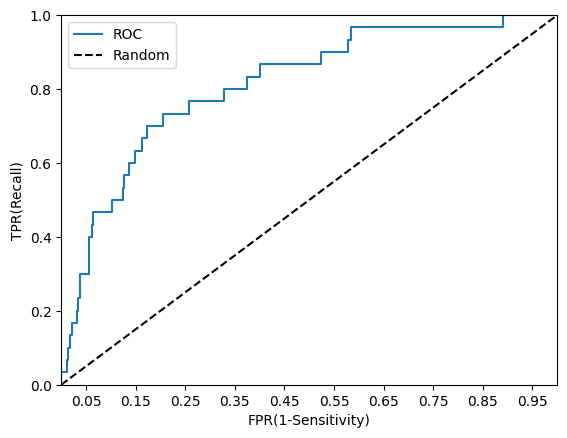

lda의 ROC AUC값: 0.8129


In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lda_clf.predict_proba(X_test)[:,1])
pred_proba = lda_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))


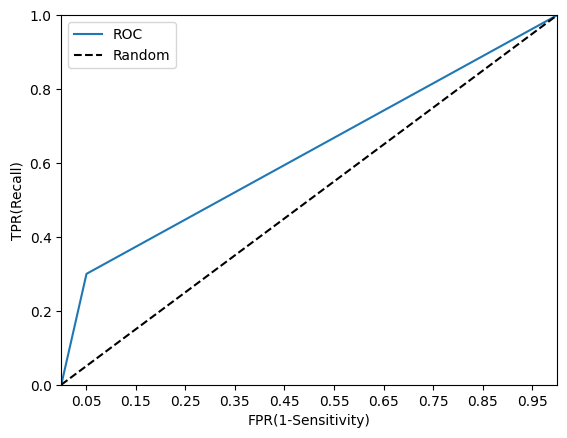

lda의 ROC AUC값: 0.6246


In [48]:
roc_curve_plot(y_test, lda_clf.predict(X_test))
roc_score = roc_auc_score(y_test, lda_pred)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))

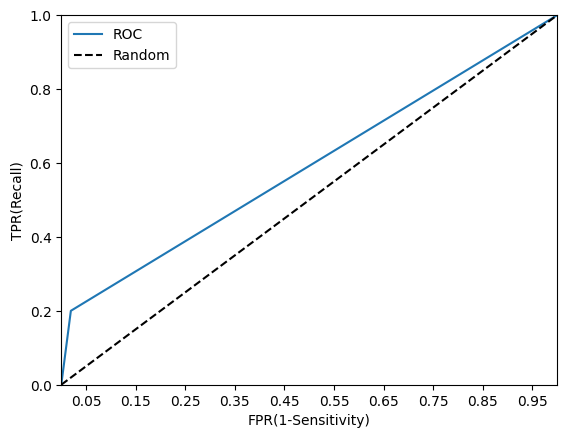

dt ROC AUC값: 0.5903


In [49]:
roc_curve_plot(y_test, dt_clf.predict_proba(X_test)[:,1])
pred_proba = dt_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('dt ROC AUC값: {0:.4f}'.format(roc_score))


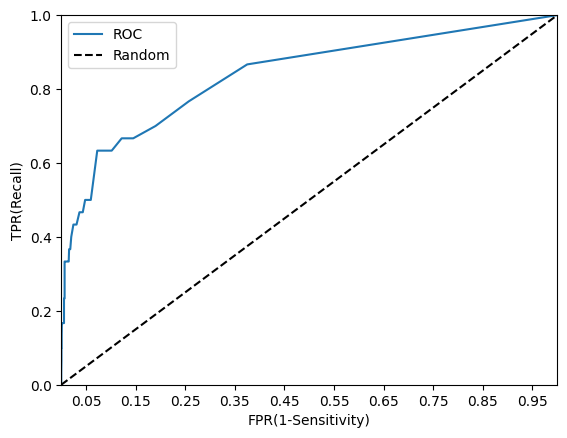

rf ROC AUC값: 0.8381


In [50]:
roc_curve_plot(y_test, rf_clf.predict_proba(X_test)[:,1])
pred_proba = rf_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('rf ROC AUC값: {0:.4f}'.format(roc_score))

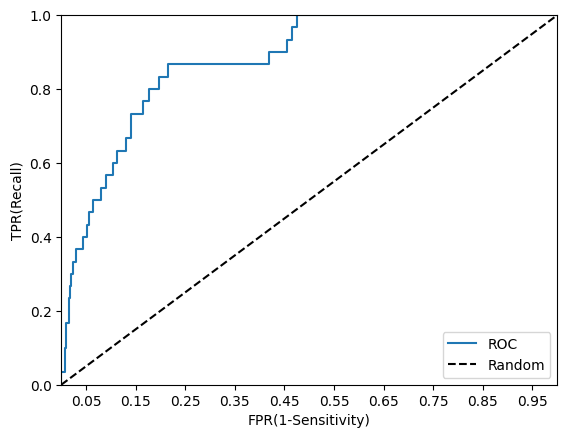

lr ROC AUC값: 0.8753


In [51]:
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])
pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('lr ROC AUC값: {0:.4f}'.format(roc_score))

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


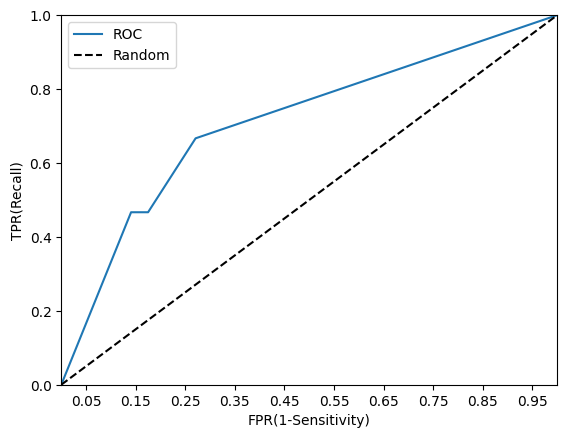

c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


knn ROC AUC값: 0.7108


In [52]:
roc_curve_plot(y_test, knn_clf.predict_proba(X_test)[:,1])
pred_proba = knn_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))

In [ ]:
roc_curve_plot(y_test, knn_clf.predict_proba(X_test)[:,1])
pred_proba = knn_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))
